## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [16]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow import keras

**QUESTION:** Load dataset and display some lines of the csv file.

In [2]:
#On charge le dataset 
dataset_path = "ai4i2020.csv"
df = pd.read_csv(dataset_path)

# On affiche les premières lignes du dataset
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

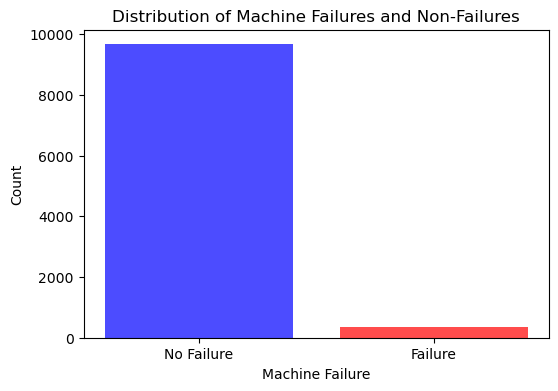

In [49]:
# On compte le nombre de pannes et de non-pannes
failure_counts = df["Machine failure"].value_counts()

# On affiche la distribution sous forme de barres
plt.figure(figsize=(6,4))
plt.bar(["No Failure", "Failure"], failure_counts, alpha=0.7, color=['blue', 'red'])
plt.xlabel("Machine Failure")
plt.ylabel("Count")
plt.title("Distribution of Machine Failures and Non-Failures")
plt.show()

**ANALYSIS QUESTION:** What do you observe?

Il y a un déséquilibre important entre les machines en panne et celles qui ne le sont pas. 

La grande majorité des machines ne sont pas tombées en panne (en bleu). Seule une petite fraction des machines a connu des défaillances (en rouge).

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

Le déséquilibre dans l'ensemble de données aura un impact négatif sur la capacité du modèle à apprendre et à se généraliser correctement. 

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

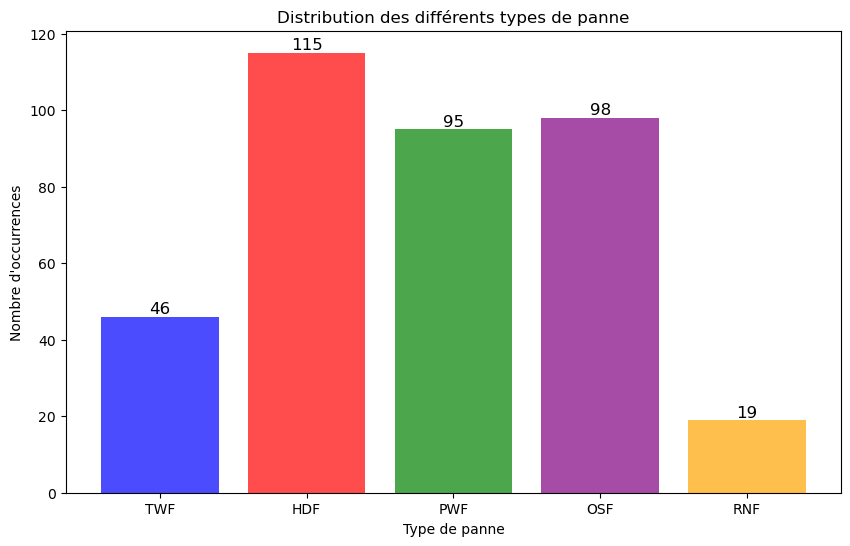

In [61]:
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]
failure_counts = df[failure_types].sum()  # On ne compte que les types de panne spécifiques

plt.figure(figsize=(10, 6))
bars = plt.bar(failure_counts.index, failure_counts.values, alpha=0.7, color=['blue', 'red', 'green', 'purple', 'orange'])

# Afficher les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel("Type de panne")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des différents types de panne")
plt.show()


 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

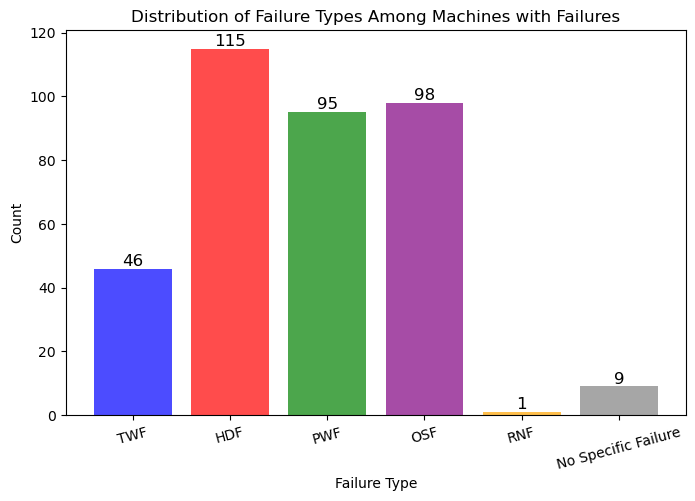

In [55]:
# Filtrer uniquement les machines qui ont eu une panne (Machine failure == 1)
failed_machines = df[df["Machine failure"] == 1]

# On compte les occurrences de chaque type de panne
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]
failure_counts = failed_machines[failure_types].sum()

# On ajoute la catégorie "No Specific Failure" (cas où Machine failure == 1 mais aucune panne spécifique)
no_specific_failure_count = (failed_machines[failure_types].sum(axis=1) == 0).sum()
failure_counts["No Specific Failure"] = no_specific_failure_count

# bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(failure_counts.index, failure_counts.values, alpha=0.7, color=['blue', 'red', 'green', 'purple', 'orange', 'gray'])

# On ajoute les valeurs au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.title("Distribution of Failure Types Among Machines with Failures")
plt.xticks(rotation=15)  
plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [60]:
print(df.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
Failure_Type                object
target                      object
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

"Write your response here"

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [131]:
X = df.drop(columns=["Product ID", "Type", "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"])  # suppression des colonnes non pertinentes

df["Machine functional"] = 1 - df["Machine failure"]

Y = df[["Machine functional", "TWF", "HDF", "PWF", "OSF", "RNF"]] # variables cibles multi-label

X = pd.get_dummies(X)

# jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# nombre d'éléments dans chaque ensemble
print("Number of elements in each dataset:")
print(f"X_train: {len(X_train)}")
print(f"Y_train: {len(Y_train)}")
print(f"X_test: {len(X_test)}")
print(f"Y_test: {len(Y_test)}")

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Number of elements in each dataset:
X_train: 8000
Y_train: 8000
X_test: 2000
Y_test: 2000
X_train shape: (8000, 17)
Y_train shape: (8000, 6)
X_test shape: (2000, 17)
Y_test shape: (2000, 6)


**QUESTION** Code below the model architecture

In [135]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # premiere couche cachée avec 64 neurones
    keras.layers.Dropout(0.2),  # dropout pour éviter l'overfitting
    keras.layers.Dense(32, activation='relu'),  # deuxieme couche cachée avec 32 neurones
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),  # troisieme couche cachée avec 16 neurones
    keras.layers.Dense(6, activation='softmax')  
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,062 (27.59 KB)

 Trainable params: 7,062 (27.59 KB)

 Non-trainable params: 0 (0.00 B)

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7310 - loss: 113.5369 - val_accuracy: 0.9705 - val_loss: 4.8671
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.9200 - loss: 5.1218 - val_accuracy: 0.9705 - val_loss: 0.5022
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9550 - loss: 0.9882 - val_accuracy: 0.9705 - val_loss: 0.4423
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.9634 - loss: 0.5531 - val_accuracy: 0.9705 - val_loss: 0.3068
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9647 - loss: 0.3784 - val_accuracy: 0.9705 - val_loss: 0.2538
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9593 - loss: 0.4083 - val_accuracy: 0.9705 - val_loss: 0.2364
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9646 - loss: 0.2941 - val_accuracy: 0.9705 - val_loss: 0.2324
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9664 - loss: 0.2605 - 

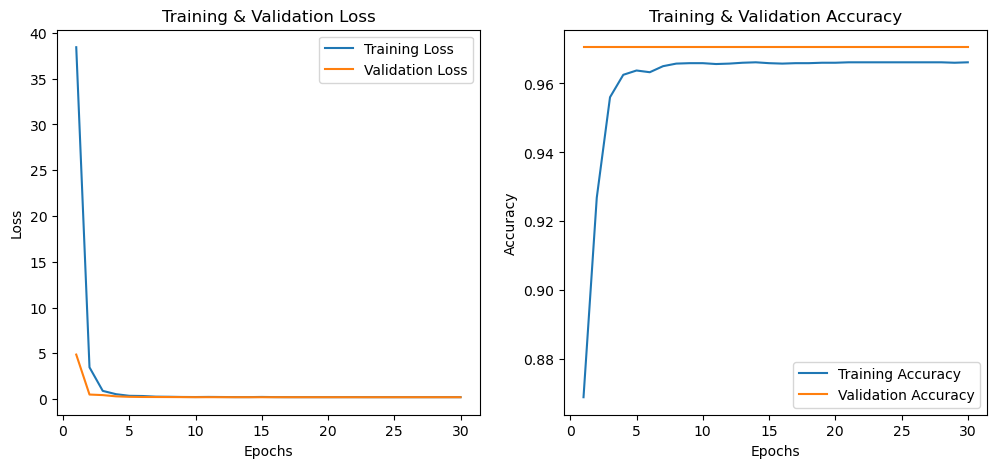

In [136]:

#on entraine le modèle
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)


# Tracer la perte (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Tracer la précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


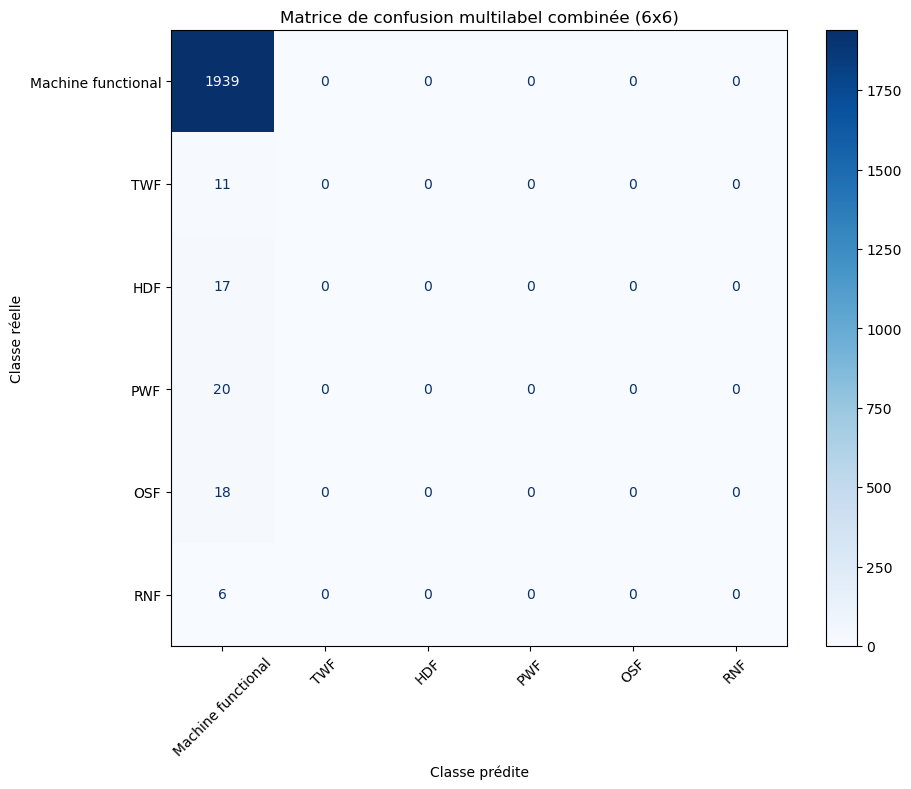

Classification Report détaillé:

                    precision    recall  f1-score   support

Machine functional       0.97      1.00      0.98      1939
               TWF       0.00      0.00      0.00        11
               HDF       0.00      0.00      0.00        17
               PWF       0.00      0.00      0.00        20
               OSF       0.00      0.00      0.00        18
               RNF       0.00      0.00      0.00         6

         micro avg       0.97      0.96      0.97      2011
         macro avg       0.16      0.17      0.16      2011
      weighted avg       0.93      0.96      0.95      2011
       samples avg       0.97      0.97      0.97      2011



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

# Prédiction du modèle
Y_pred_proba = model.predict(X_test)
Y_pred = (Y_pred_proba >= 0.5).astype(int)

classes = ["Machine functional", "TWF", "HDF", "PWF", "OSF", "RNF"]

# Créer une matrice vide 6x6
cm_combined = np.zeros((6, 6), dtype=int)

# Remplir la matrice de confusion combinée
for true, pred in zip(Y_test.values, Y_pred):
    for i in range(6):  # classe réelle
        if true[i] == 1:
            for j in range(6):  # classe prédite
                if pred[j] == 1:
                    cm_combined[i, j] += 1

# Afficher la matrice de confusion avec ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_combined, display_labels=classes)
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite')
plt.title("Matrice de confusion multilabel")
plt.xticks(rotation=45)
plt.show()

# Afficher le rapport de classification détaillé
print("Classification Report détaillé:\n")
print(classification_report(Y_test, Y_pred, target_names=classes))


**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
X = df.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
Y = df[['Machine functional', 'TWF', 'HDF', 'PWF', 'OSF']]


categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Séparer en jeu d'entraînement et de test (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42
)

# Standardisation des features numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_resampled = Y_train.copy()

for col in Y_train.columns:
    smote = SMOTE(sampling_strategy=0.5, random_state=42)
    X_resampled, Y_resampled[col] = smote.fit_resample(X_train_scaled, Y_train[col])



# Afficher les dimensions des ensembles après équilibrage
print(f'Training set (X): {X_train_scaled.shape[0]} rows, {X_train_scaled.shape[1]} columns')
print(f'Training set (Y): {Y_resampled.shape[0]} éléments')
print(f'Test set (X): {X_test_scaled.shape[0]} rows, {X_test_scaled.shape[1]} columns')
print(f'Test set (Y): {Y_test.shape[0]} éléments')

# Vérification de la répartition des classes après équilibrage
print("\nDistribution des classes dans Y après équilibrage :")
print(Y_resampled.value_counts())

Training set (X): 8000 rows, 10016 columns
Training set (Y): 8000 éléments
Test set (X): 2000 rows, 10016 columns
Test set (Y): 2000 éléments

Distribution des classes dans Y après équilibrage :
Machine functional  TWF  HDF  PWF  OSF
1                   0    0    0    0      6163
0                   1    1    1    1      1613
                    0    1    0    0        76
                         0    0    1        53
                              1    0        49
                    1    0    0    0        27
                    0    0    0    0         6
                              1    1         6
                         1    0    1         5
                    1    0    0    1         1
                              1    1         1
Name: count, dtype: int64


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='softmax') 
])

# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Afficher le résumé de l'architecture du modèle
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 64)             │       640,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,137 (2.45 MB)

 Trainable params: 643,137 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

**QUESTION** Code below the algorithms allowing to train model


In [146]:
history = model.fit(
    X_train_scaled, Y_resampled,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, Y_test)
)

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_100" is incompatible with the layer: expected axis -1 of input shape to have value 10007, but received input with shape (32, 10016)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 10016), dtype=float32)
  • training=True
  • mask=None

**QUESTION** Plot the confusion matrix and the classification report

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


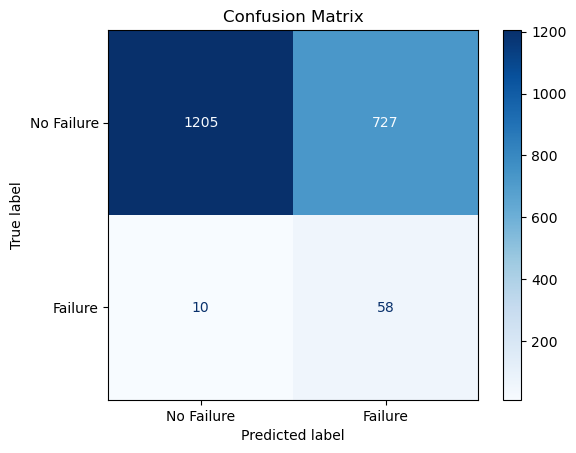

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.77      1932
           1       0.07      0.85      0.14        68

    accuracy                           0.63      2000
   macro avg       0.53      0.74      0.45      2000
weighted avg       0.96      0.63      0.74      2000



In [ ]:
Y_pred_prob = model.predict(X_test_scaled)
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, display_labels=["No Failure", "Failure"], cmap="Blues", values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print("Classification Report:\n", classification_report(Y_test, Y_pred))



df['failure_type'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].idxmax(axis=1)
df.loc[df['Machine failure'] == 0, 'failure_type'] = 'No Failure'

Y_multiclass = df['failure_type']

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"